In [141]:
using DifferentialEquations
using Plots
using Makie
using Dierckx
gr(fmt = :png)

Plots.GRBackend()

In [102]:
function diff_eq(du, u, p, t)
    du[1] = -u[2] + p[1]*cos(p[2]*t)
    du[2] = u[1]
end

diff_eq (generic function with 1 method)

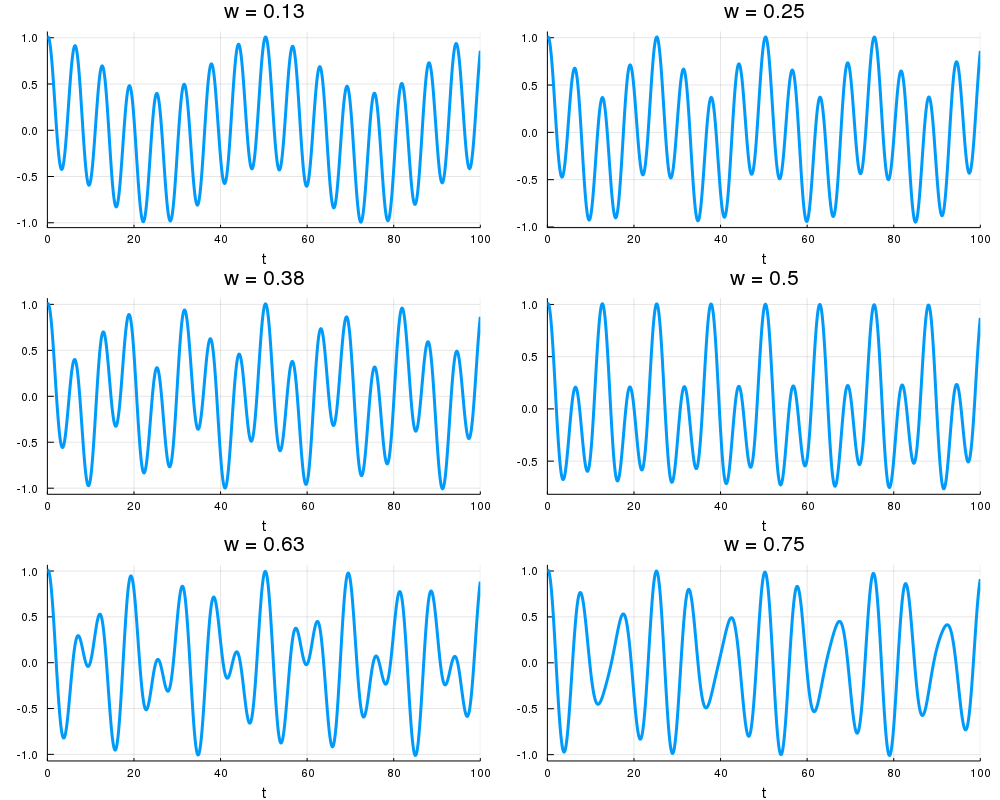

In [116]:
u0 = [0.1;1.0]
tspan = (0.0,100.0)
p0 = [0.3, 2*pi*0.02]
p = deepcopy(p0)
prob = ODEProblem(diff_eq,u0,tspan,p)
sol = solve(prob)
p1 = Plots.plot(sol, vars = (0,2), title = "w = $(round(p[2], digits = 2))")

p[2] = p0[2]*2
prob = ODEProblem(diff_eq,u0,tspan,p)
sol = solve(prob)
p2 = Plots.plot(sol, vars = (0,2), title = "w = $(round(p[2], digits = 2))")

p[2] = p0[2]*3
prob = ODEProblem(diff_eq,u0,tspan,p)
sol = solve(prob)
p3 = Plots.plot(sol, vars = (0,2), title = "w = $(round(p[2], digits = 2))")

p[2] = p0[2]*4
prob = ODEProblem(diff_eq,u0,tspan,p)
sol = solve(prob)
p4 = Plots.plot(sol, vars = (0,2), title = "w = $(round(p[2], digits = 2))")

p[2] = p0[2]*5
prob = ODEProblem(diff_eq,u0,tspan,p)
sol = solve(prob)
p5 = Plots.plot(sol, vars = (0,2), title = "w = $(round(p[2], digits = 2))")

p[2] = p0[2]*6
prob = ODEProblem(diff_eq,u0,tspan,p)
sol = solve(prob)
p6 = Plots.plot(sol, vars = (0,2), title = "w = $(round(p[2], digits = 2))")

Plots.plot(p1, p2, p3, p4, p5, p6, layout = @layout([a b; c d; e f]), legend = :none, size = (1000,800))

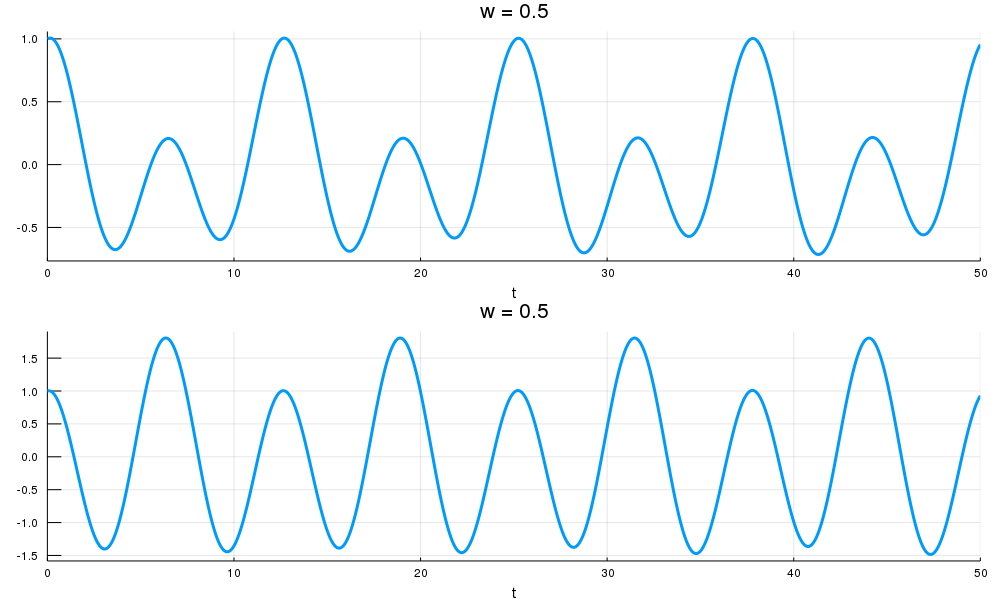

In [200]:
u0 = [0.1;1.0]
tspan = (0.0,50.0)
p0 = [0.3, 2*pi*0.02*4]
p = deepcopy(p0)
prob = ODEProblem(diff_eq,u0,tspan,p)
sol1 = solve(prob)
p1 = Plots.plot(sol1, vars = (0,2), title = "w = $(round(p[2], digits = 2))")
 

p[1] = -p0[1]
prob = ODEProblem(diff_eq,u0,tspan,p)
sol2 = solve(prob)
p2 = Plots.plot(sol2, vars = (0,2), title = "w = $(round(p[2], digits = 2))")

Plots.plot(p1, p2, layout = (2, 1), legend = :none, size = (1000, 600))

In [201]:
sol1_arr = [sol1[2, i] for i = 1:size(sol1,2)]
sol1_t = [sol1.t[i] for i = 1:size(sol1,2)]
spl1 = Spline1D(sol1_t, sol1_arr)

Spline1D(knots=[0.0,0.250932 … 48.9986,50.0] (65 elements), k=3, extrapolation="nearest", residual=0.0)

In [202]:
sol2_arr = [sol2[2, i] for i = 1:size(sol2,2)]
sol2_t = [sol2.t[i] for i = 1:size(sol2,2)]
spl2 = Spline1D(sol2_t, sol2_arr)

Spline1D(knots=[0.0,0.220254 … 48.7544,50.0] (65 elements), k=3, extrapolation="nearest", residual=0.0)

In [207]:
scene = Scene(resolution = (1000, 1000))

ff(t,s) = (spl1(t)*cos(s), spl2(t)*sin(s))
time = Node(0.0)
limits = FRect(-2.5, -2.5, 5, 5)
p1 = lines!(scene, lift(t-> ff.(t, range(0, stop = 2pi, length = 300)), time), color = :blue, linewidth = 3, limits = limits)
N = 1000
record(scene, "D:\\Documents\\Diplomka\\Animations\\string_grav_wave3.gif", range(tspan[1], stop = tspan[2], length = N)) do i
    push!(time, i)
    sleep(1/120)
end

"D:\\Documents\\Diplomka\\Animations\\string_grav_wave3.gif"